 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [803]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import os

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [804]:
# Reading whale returns
# Set the filepath (make sure my csv is saved to the same folder, or back out and use the correct relative path to navigate to the right folder)
whale_returns = Path('whale_returns.csv')

# Read the csv with pandas. At the same time I want to set the index to the Date column that's listed in the csv, and infer a datetime format)
whale_returns = pd.read_csv(whale_returns, index_col='Date', infer_datetime_format=True)

# I also want to sort the datetimeindex to make better sense of it
whale_returns.sort_index()

# I want to display it to check
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [805]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [806]:
# Dropping nulls is scary, but in this case seems ok because all the null values appear to be in one row. Out of curiosity I also want to see how many rows I'm dealing with here, to get a sense of the impact of the nulls.
whale_returns.describe

<bound method NDFrame.describe of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN 

In [807]:
# Drop nulls
whale_returns = whale_returns.dropna()
# noting that I first used just whale_returns.dropna() without saving it to the variable, and the nulls didn't drop.
# I want to check if the nulls dropped out
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [808]:
# It looks like that worked because the null values were in the 3/2/2015 row, and that row is gone.
# Checking that all nulls are now zero
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [809]:
# Reading algorithmic returns
algo_returns = Path('algo_returns.csv')
algo_returns = pd.read_csv(algo_returns, index_col='Date', infer_datetime_format=True)
algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [810]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [811]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [812]:
# Reading S&P 500 Closing Prices
sp500_history = Path('sp500_history.csv')
sp500_history = pd.read_csv(sp500_history, index_col='Date', infer_datetime_format=True)
sp500_history.sort_index()
sp500_history.head()

,Close
Date,
23-Apr-19,$2933.68
22-Apr-19,$2907.97
18-Apr-19,$2905.03
17-Apr-19,$2900.45
16-Apr-19,$2907.06


In [813]:
# Check Data Types
# Checking for whale returns, but these are already formatted as daily returns so I'd expect no issues.
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [814]:
# Whale returns looks ok, I'd expect float types. Checking Algoruthmic Returns next
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [815]:
# Algo also ok, I'd expect floats. Checking S&P:
sp500_history.dtypes

Close    object
dtype: object

In [816]:
# Fix Data Types
# SP500 closing prices are coming through as objects, and are also still listed in closing prices, not in daily returns.
# In the Close column of the S&P 500 dataframe, I want to (1) strip out any extra spaces or weirdness (will use .str method); (2) remove the dollar signs (will use .replace function); and (3) re-case all of these objects as floats
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').astype(float)


/var/folders/d9/6r5nm8y56sbbg2kbt5s3pxhr0000gn/T/ipykernel_48315/2221381938.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').astype(float)


In [817]:
# I'm not exactly sure what a future warning means. I looked it up briefly, it looks like something to do with a new version of pandas, I'm not going to worry about it for now.
# I want to check the data types again to make sure it worked
sp500_history.dtypes

Close    float64
dtype: object

In [818]:
# Calculate Daily Returns
# I want to calculate daily returns for the S&P 500 close prices by using the percent change function.
# I'm going to be comparing returns to returns, so I don't need the closing prices anymore, and I'm going to overwrite them.
sp500_history = sp500_history.pct_change()
sp500_history.head()

,Close
Date,
23-Apr-19,NaN
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279


In [819]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.head()

,Close
Date,
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279
15-Apr-19,-0.000509


In [820]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.rename(columns={'Close':'S&P 500'}, inplace=True)
sp500_history.head()

,S&P 500
Date,
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279
15-Apr-19,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [821]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
compare_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis='columns', join='inner')
compare_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,


---

In [822]:
# Shit! DateTimeIndex!
whale_returns.index = pd.to_datetime(whale_returns.index)
algo_returns.index = pd.to_datetime(algo_returns.index)
sp500_history.index = pd.to_datetime(sp500_history.index)
sp500_history.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [823]:
daily_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis='columns', join='inner')
daily_returns.sort_index(inplace=True)
daily_returns.columns=('Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo 1', 'Algo 2', 'S&P 500')
daily_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

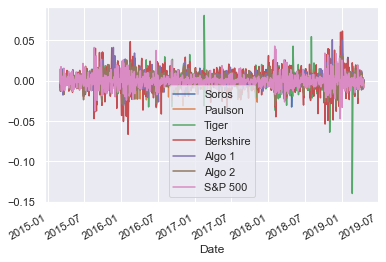

In [824]:
# Plot daily returns of all portfolios
daily_returns.plot()

<AxesSubplot:title={'center':'Daily Returns (2015-2019): Humans vs. Algorithms vs. Market'}, xlabel='Date'>

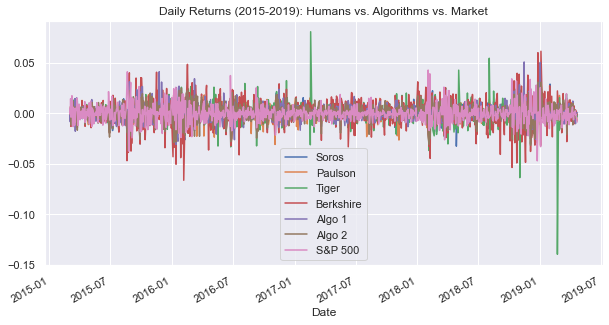

In [825]:
# I'm going to make it a little bigger using the figsize parameter and give it a title:
daily_returns.plot(figsize=(10,5), title='Daily Returns (2015-2019): Humans vs. Algorithms vs. Market')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns (2015-2019): Humans vs. Algorithms vs. Market'}, xlabel='Date'>

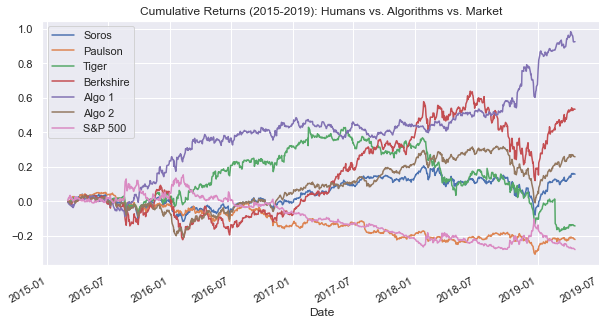

In [826]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title='Cumulative Returns (2015-2019): Humans vs. Algorithms vs. Market')

In [827]:
cumulative_returns.tail(1)

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-22,0.15628,-0.223061,-0.144348,0.533046,0.925124,0.257151,-0.281524


In [828]:
cumulative_returns.columns
cumulative_returns_chart = pd.DataFrame({'Portfolio':['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo 1', 'Algo 2', 'S&P 500'], 'Cumulative Returns Apr 2019': [15.6, -22.3, -14.4, 53.3, 92.5, 25.7, -28.1]})
cumulative_returns_chart = cumulative_returns_chart.set_index('Portfolio')
cumulative_returns_chart = cumulative_returns_chart.sort_values('Cumulative Returns Apr 2019')
cumulative_returns_chart.head(10)

,Cumulative Returns Apr 2019
Portfolio,
S&P 500,-28.1
Paulson,-22.3
Tiger,-14.4
Soros,15.6
Algo 2,25.7
Berkshire,53.3
Algo 1,92.5


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Plot - Daily Returns (2015-2019): Humans vs. Algorithms vs. Market'}>

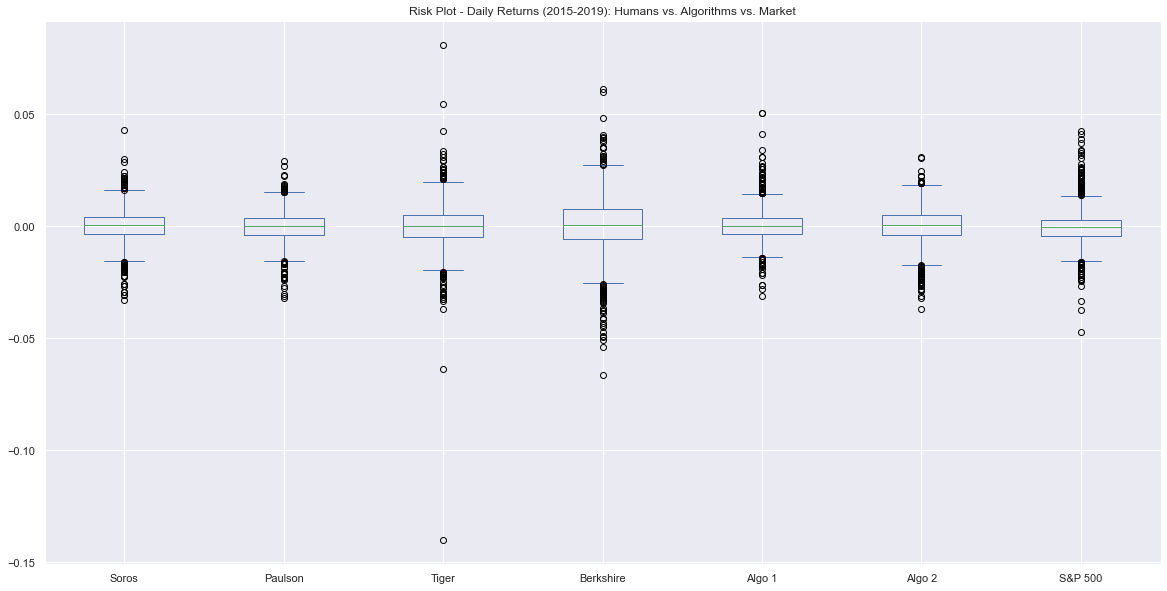

In [829]:
# Box plot to visually show risk
# I'm not exactly sure what the purpose of a box plot is with this data, 
daily_returns.plot.box(figsize=(20,10), title='Risk Plot - Daily Returns (2015-2019): Humans vs. Algorithms vs. Market')


### Calculate Standard Deviations

In [830]:
# Calculate the daily standard deviations of all portfolios

# Can run the .std() function over the whole dataframe to calculate standard deviation on each column
portfolio_daily_std = daily_returns.std()
# I want to sort the resulting standard deviation values
portfolio_daily_std = portfolio_daily_std.sort_values(ascending=False)
portfolio_daily_std.head(7)

Berkshire    0.012919
Tiger        0.010897
S&P 500      0.008587
Algo 2       0.008341
Soros        0.007896
Algo 1       0.007623
Paulson      0.007026
dtype: float64

In [831]:
# For my charts below, I wanted to make this a dataframe 

daily_stdev_chart = portfolio_daily_std.reset_index()
daily_stdev_chart.columns=['Portfolio', 'Daily STD']
daily_stdev_chart = daily_stdev_chart.set_index('Portfolio')
daily_stdev_chart = daily_stdev_chart.sort_values('Daily STD')
daily_stdev_chart.head(8)

,Daily STD
Portfolio,
Paulson,0.007026
Algo 1,0.007623
Soros,0.007896
Algo 2,0.008341
S&P 500,0.008587
Tiger,0.010897
Berkshire,0.012919


### Determine which portfolios are riskier than the S&P 500

In [832]:
# Calculate  the daily standard deviation of S&P 500

# I'm going to do this by going back to my daily returns dataframe and selecting the S&P column, but I think I'd rather turn the portfolio_daily_std into a table and evaluate that way.
sp500_daily_std = daily_returns['S&P 500'].std()

# I want to print the result in an f string that tells me what I'm printing, so it's not just random numbers.
print(f'Daily Standard Deviation of S&P 500 (2015-2019): {sp500_daily_std}')


Daily Standard Deviation of S&P 500 (2015-2019): 0.00858688974707399


In [833]:
# Determine which portfolios are riskier than the S&P 500

# Now I definitely want to put that portfolio_daily_std into a dataframe, instead of re-calculating the standard deviations over each column in my daily returns dataframe.
# There has to be an easy way to do it but I've tried a couple different things (adding column headers, using .dataframe) and can't get it to work.
# My next idea would be to loop through and pull out the information into a list, and then add those lists into a dataframe, but I can't figure out how to do that quickly.
# I'm just going to calculate each standard deviation by referring back to the columns.
berkshire_daily_std = daily_returns['Berkshire'].std()
tiger_daily_std = daily_returns['Tiger'].std()
algo_1_daily_std = daily_returns['Algo 1'].std()
algo_2_daily_std = daily_returns['Algo 2'].std()
soros_daily_std = daily_returns['Soros'].std()
paulson_daily_std = daily_returns['Paulson'].std()

# Now I'm going to add all the daily standard devs to a list:
all_daily_std = [berkshire_daily_std, tiger_daily_std, algo_1_daily_std, algo_2_daily_std, soros_daily_std, paulson_daily_std]
print(all_daily_std)


[0.012918753062201797, 0.010897305414583355, 0.007622690854822048, 0.008341234467834717, 0.007896188745252348, 0.007025515427605775]


In [834]:
# This is frustrating. I want to run my comparison and then print the name of the portfolios that are more risky than the S&P but it's going to be absurdly manual with this silly list.
# I'm going to try to convert this to a dataframe again.

portfolio_daily_std = portfolio_daily_std.reset_index()
portfolio_daily_std.head(7)

# Now that I've got the right dataframe here I'm going to # the code to set the index. Every time I have to run all it messes everything up.

,index,0
0,Berkshire,0.012919
1,Tiger,0.010897
2,S&P 500,0.008587
3,Algo 2,0.008341
4,Soros,0.007896
5,Algo 1,0.007623
6,Paulson,0.007026


In [835]:
# Yes! Got it! I'm going to rename the columns.
portfolio_daily_std.columns=['Portfolio', 'Daily STD']
portfolio_daily_std.head()

,Portfolio,Daily STD
0,Berkshire,0.012919
1,Tiger,0.010897
2,S&P 500,0.008587
3,Algo 2,0.008341
4,Soros,0.007896


In [836]:
# Now to make the comparison: which portfolios are riskier than the S&P?
# Looking for all portfolios that have a higher standard dev than the S&P:
names_riskier_than_sp500 = portfolio_daily_std.loc[portfolio_daily_std['Daily STD'] > sp500_daily_std, ['Portfolio']]
print(f'Riskier than S&P 500: {names_riskier_than_sp500}')


Riskier than S&P 500:    Portfolio
0  Berkshire
1      Tiger


In [837]:
# Just having the names isn't super useful. I'd rather have a more descriptive version of the data, probably in a table that shows me the std of the risky portfolios and the S&P 500.
# I'd want to see how much riskier they are.
riskier_than_sp500 = portfolio_daily_std.loc[portfolio_daily_std['Daily STD'] >= sp500_daily_std]
riskier_than_sp500.reset_index(drop=True)
print('Market Risk (S&P 500) and Portfolios Riskier than Market, 2015-2019:')
riskier_than_sp500.head()

Market Risk (S&P 500) and Portfolios Riskier than Market, 2015-2019:


,Portfolio,Daily STD
0,Berkshire,0.012919
1,Tiger,0.010897
2,S&P 500,0.008587


### Calculate the Annualized Standard Deviation

In [838]:
# Calculate the annualized standard deviation (252 trading days)

# This formula doesn't seem to like my pretty dataframe so I have to set a non-dataframe version of the daily std again:
daily_std = daily_returns.std()
annualized_std = daily_std * np.sqrt(252)
annualized_std

Soros        0.125348
Paulson      0.111527
Tiger        0.172989
Berkshire    0.205079
Algo 1       0.121006
Algo 2       0.132413
S&P 500      0.136313
dtype: float64

In [839]:
# I want it in a chart to better plot it below:

annualized_std_chart = annualized_std.reset_index()
annualized_std_chart = annualized_std_chart.reset_index()
annualized_std_chart = annualized_std_chart.drop(columns='level_0')
annualized_std_chart.columns=['Portfolio', 'Annualized STD']
annualized_std_chart = annualized_std_chart.set_index('Portfolio')
annualized_std_chart = annualized_std_chart.sort_values('Annualized STD')

annualized_std_chart.head(7)

,Annualized STD
Portfolio,
Paulson,0.111527
Algo 1,0.121006
Soros,0.125348
Algo 2,0.132413
S&P 500,0.136313
Tiger,0.172989
Berkshire,0.205079


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

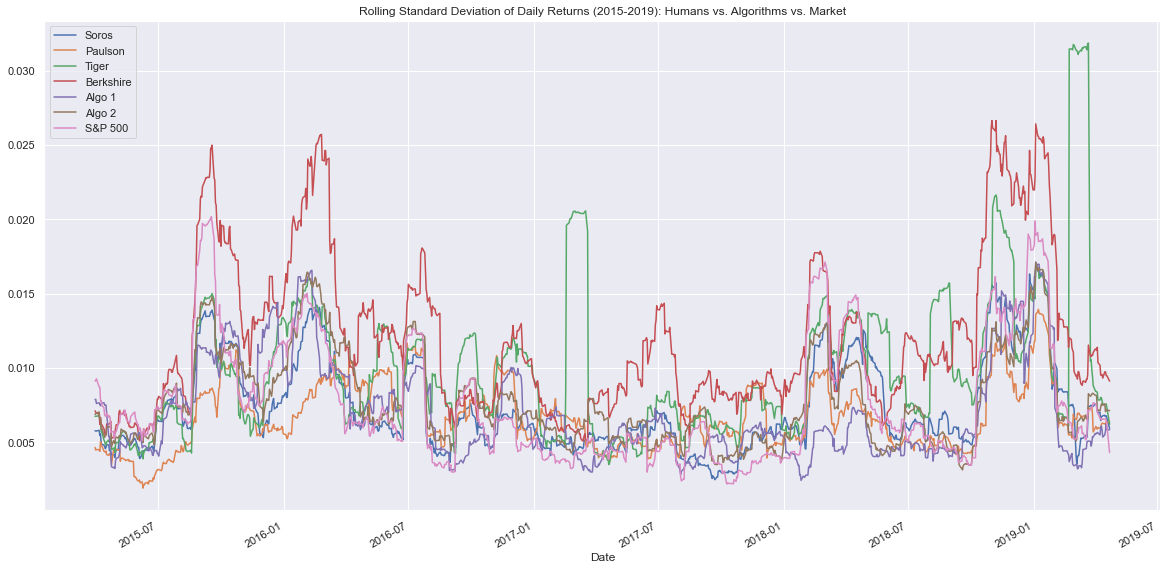

In [840]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

portfolio_rolling_std_21 = daily_returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Standard Deviation of Daily Returns (2015-2019): Humans vs. Algorithms vs. Market')

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [841]:
# Calculate the correlation
correlation = daily_returns.corr()
# Display de correlation matrix
correlation

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Soros,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
Paulson,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
Tiger,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
Berkshire,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

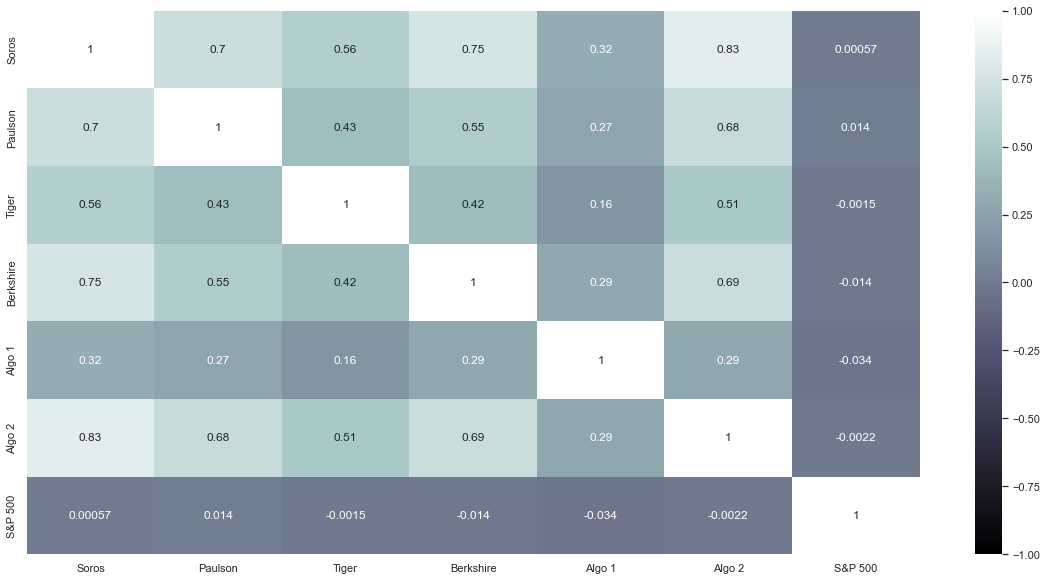

In [842]:
# I want to see how the correlation works in a heatmap:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True,  cmap="bone")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 21-Day Beta of Tiger Global Management'}, xlabel='Date'>

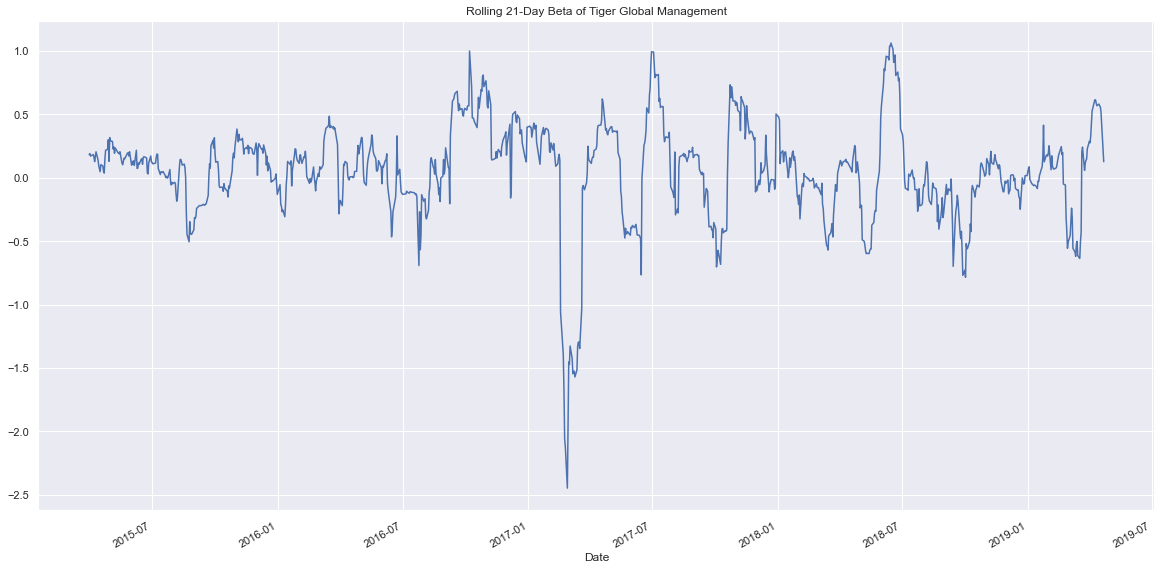

In [843]:
# Calculate covariance of a single portfolio
# A covariance is a comparison between 2 datasets, here it's Tiger vs. S&P
covariance_tiger = daily_returns['Tiger'].cov(daily_returns['S&P 500'])

# Calculate variance of S&P 500
variance = daily_returns['S&P 500'].var()

# Computing beta
tiger_beta = covariance_tiger / variance

# Plot beta trend
# The covariance, variance, and beta calculations give us only 1 number, so to plot the beta trend I'll use a 21-day rolling beta plot.
rolling_covariance_tiger = daily_returns['Tiger'].rolling(window=21).cov(daily_returns['S&P 500'])
rolling_variance = daily_returns['S&P 500'].rolling(window=21).var()
rolling_tiger_beta = rolling_covariance_tiger / rolling_variance
rolling_tiger_beta.plot(figsize=(20,10), title='Rolling 21-Day Beta of Tiger Global Management')

In [844]:
# For the beta values, I want to calculate the rolling beta of all the columns in my daily returns table, and then create a beta table.
# 1. I will save my variables so I can put them in the formula
#       Variables are: 
#       a. column names in daily returns table, except no S&P or rf rate
#       b. S&P 500 daily returns
# 2. I will create a calculation for beta with the interchangeable variables 
#       a. my variance variable will stay the same
#       b. I will create a new covariance variable
#       

# Save the column names to a list and create sp500 returns variable
daily_returns.columns
portfolios = ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo 1', 'Algo 2']
sp500_returns = daily_returns['S&P 500']

# Create a new covariance variable
ticker_covariance = daily_returns.rolling(window=21).cov()
ticker_covariance = ticker_covariance.loc[pd.IndexSlice[:, portfolios], 'S&P 500'].dropna()
ticker_covariance

# My benchmark variance is already defined as variance
beta_table = ticker_covariance / variance
beta_table


Date              
2015-03-31  Soros     0.108203
2015-04-01  Soros     0.113119
2015-04-02  Soros     0.106805
2015-04-06  Soros     0.083162
2015-04-07  Soros     0.063587
                        ...   
2019-04-15  Algo 2    0.060488
2019-04-16  Algo 2    0.054319
2019-04-17  Algo 2    0.058569
2019-04-18  Algo 2    0.062885
2019-04-22  Algo 2    0.008043
Name: S&P 500, Length: 6132, dtype: float64

In [845]:
# Now I have all the rolling betas but it's adding all the calculations to separate rows. 
# I want to reset my index to the date, and then split the stocks back into separate columns.

# Reset index
beta_table = beta_table.reset_index()
beta_table.head()



,Date,level_1,S&P 500
0,2015-03-31,Soros,0.108203
1,2015-04-01,Soros,0.113119
2,2015-04-02,Soros,0.106805
3,2015-04-06,Soros,0.083162
4,2015-04-07,Soros,0.063587


In [846]:
# Set the column names

beta_table.columns=['Date', 'Portfolio', 'Beta']
beta_table.head()

,Date,Portfolio,Beta
0,2015-03-31,Soros,0.108203
1,2015-04-01,Soros,0.113119
2,2015-04-02,Soros,0.106805
3,2015-04-06,Soros,0.083162
4,2015-04-07,Soros,0.063587


In [847]:
# Set the index as the date
beta_table.set_index('Date', inplace=True)
beta_table.head()

,Portfolio,Beta
Date,,
2015-03-31,Soros,0.108203
2015-04-01,Soros,0.113119
2015-04-02,Soros,0.106805
2015-04-06,Soros,0.083162
2015-04-07,Soros,0.063587


In [848]:
daily_returns.columns

Index(['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo 1', 'Algo 2',
       'S&P 500'],
      dtype='object')

In [849]:
# I will split out the values of each portfolio into its own dataframe. 
#daily_returns.columns ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo 1', 'Algo 2', 'S&P 500']
soros_beta = beta_table[beta_table['Portfolio']=='Soros']
paulson_beta = beta_table[beta_table['Portfolio']=='Paulson']
tgr_beta = beta_table[beta_table['Portfolio']=='Tiger']
berkshire_beta = beta_table[beta_table['Portfolio']=='Berkshire']
algo_1_beta = beta_table[beta_table['Portfolio']=='Algo 1']
algo_2_beta = beta_table[beta_table['Portfolio']=='Algo 2']

# Re-name the columns to drop the names of the portfolios and add it to the beta column name
soros_beta.columns=['drop', 'Soros Beta']
paulson_beta.columns=['drop', 'Paulson Beta']
tgr_beta.columns=['drop', 'Tiger Beta']
berkshire_beta.columns=['drop', 'Berkshire Beta']
algo_1_beta.columns=['drop', 'Algo 1 Beta']
algo_2_beta.columns=['drop', 'Algo 2 Beta']
algo_2_beta.head()

,drop,Algo 2 Beta
Date,,
2015-03-31,Algo 2,0.148274
2015-04-01,Algo 2,0.141777
2015-04-02,Algo 2,0.121793
2015-04-06,Algo 2,0.091023
2015-04-07,Algo 2,0.064996


In [850]:
# Then concatenate the dataframes into one, and drop the 'drop' columns, so I can plot the rolling beta for all of them
all_beta = pd.concat([soros_beta, paulson_beta, tgr_beta, berkshire_beta, algo_1_beta, algo_2_beta], axis='columns', join='inner')
all_beta.drop(columns=['drop'], inplace=True)
all_beta.head()


,Soros Beta,Paulson Beta,Tiger Beta,Berkshire Beta,Algo 1 Beta,Algo 2 Beta
Date,,,,,,
2015-03-31,0.108203,0.028892,0.205890,0.174707,0.308756,0.148274
2015-04-01,0.113119,0.043684,0.215439,0.202884,0.325546,0.141777
2015-04-02,0.106805,0.029686,0.199296,0.199270,0.313554,0.121793
2015-04-06,0.083162,0.002221,0.188484,0.141787,0.326778,0.091023
2015-04-07,0.063587,-0.007645,0.169059,0.103626,0.309268,0.064996


<AxesSubplot:title={'center':'Rolling 21-Day Beta of All Portfolios'}, xlabel='Date'>

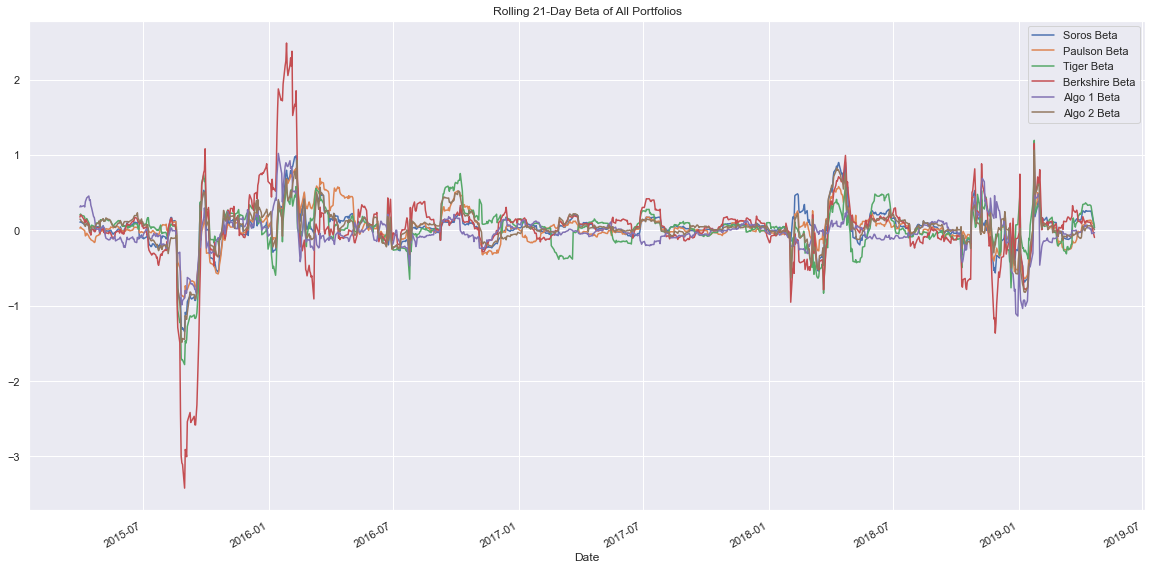

In [851]:
# Plot all rolling beta
all_beta.plot(figsize=(20,10), title='Rolling 21-Day Beta of All Portfolios')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [852]:
# Use `ewm` to calculate the rolling window
ewm = daily_returns

# I didn't do this part.


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [853]:
# Annualized Sharpe Ratios

# First reading in the risk-free rate data (Treasury bond return) from a csv
risk_free_rate = Path('risk_free_rate.csv')
risk_free_rate = pd.read_csv(risk_free_rate, index_col='Date', parse_dates=True, infer_datetime_format=True)
risk_free_rate.tail()

,rf_rate
Date,
2020-11-27,0.000010
2020-11-30,0.000009
2020-12-01,0.000010
2020-12-02,0.000010
2020-12-03,0.000009


In [854]:
# Adding the risk-free rate data to my daily returns dataframe
daily_returns = pd.concat([daily_returns, risk_free_rate], axis='columns', join='inner')
daily_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,rf_rate
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.000002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000001
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.000001
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000002


In [855]:
# Calculate sharpe ratio of the entire data set and sort the Sharpe ratio values lowest to highest
sharpe_ratios = ((daily_returns.mean()-daily_returns['rf_rate'].mean()) * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=True)
sharpe_ratios.head(8)

S&P 500     -0.779208
Paulson     -0.710552
Tiger       -0.289643
rf_rate      0.000000
Soros        0.190407
Algo 2       0.297261
Berkshire    0.506337
Algo 1       1.138814
dtype: float64

In [856]:
# I want this in a chart without rf_rate
sharpe_chart = sharpe_ratios.reset_index()
sharpe_chart.columns=['Portfolio', 'Sharpe Ratio']
sharpe_chart = sharpe_chart.set_index('Portfolio')
sharpe_chart = sharpe_chart.drop('rf_rate')
sharpe_chart = sharpe_chart.sort_values('Sharpe Ratio')
sharpe_chart.head(8)

,Sharpe Ratio
Portfolio,
S&P 500,-0.779208
Paulson,-0.710552
Tiger,-0.289643
Soros,0.190407
Algo 2,0.297261
Berkshire,0.506337
Algo 1,1.138814


<AxesSubplot:title={'center':'Sharpe Ratios'}, xlabel='Portfolio'>

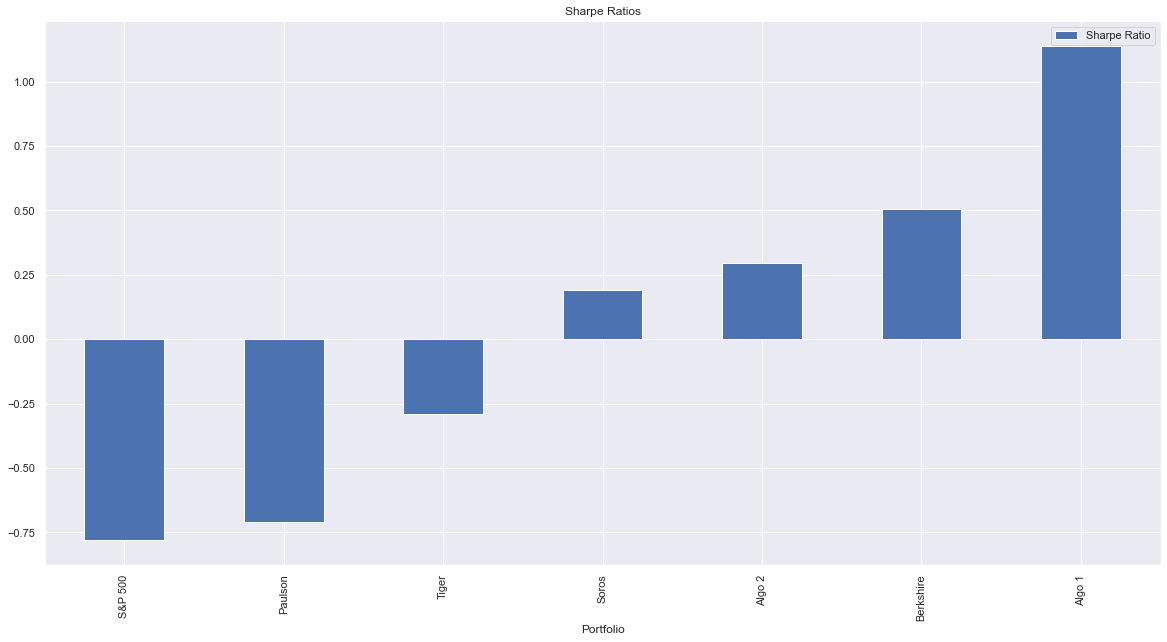

In [857]:
# Visualize the sharpe ratios as a bar plot
sharpe_chart.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

## Answer:

Yes! They did.

From 2015 to 2019, the two algorithmic strategies outperformed the market and all but one of the whale portfolios (Berkshire Hathway) in both cumulative returns and risk-adjusted metrics. 

Algorithmic Strategy 1 ("Algo 1") was the clear winner of the entire group. In its cumulative returns it demonstrated steady growth that was also the highest growth by a wide margin - 92.5% in 4 years. The runner up, Berkshire Hathaway, returned 40% less, at 53% cumulative returns. 

Algo 1 also did best in terms of risk-adjusted gains. It's annualized standard deviation was the second lowest of all portfolios analyzed, making it the least volatile portfolio after Berkshire Hathaway. And with a Sharpe ratio of 1.1, Algo 1 boasted the best risk-to-reward of the entire group. Berkshire Hathaway, by comparison, was the second-best of the group and clocked in at 0.5. It's worth noting that a Sharpe ratio of 1.1 is, in the grander scheme, only an average-to-good ratio - a very good Sharpe ratio is reached at about 2.0, and excellent at 3.0.

Algo 2 fared less well than Algo 1, but still outperformed the S&P and all whale portfolios except Berkshire. It had the third-highest cumulative gains (25.7%), and with the third-highest Sharpe ratio (0.3), was generally the third-best investment to make among this crew. Although generally runner-up to Berkshire, Algo 2 did beat it in volatility, showing more moderate swings (std of 0.13 to Berkshire's 0.20)

Other than Berkshire, the market as a whole and rest of the whale portfolios did not fare well during this time frame. The only other portfolio that returned a positive cumulative return was Soros, and 15.6%. For investors in the other funds or the S&G, though, Soros would have been a welcome middle ground as the rest lost money.


#### To help me answer the question I created an aggregate chart and bar graph of the metrics I relied on:

In [858]:
metrics_chart = pd.concat([cumulative_returns_chart, sharpe_chart, annualized_std_chart], axis='columns', join='inner')
metrics_chart['Cumulative Returns Apr 2019'] = metrics_chart['Cumulative Returns Apr 2019'] / 100
metrics_chart.head(8)

,Cumulative Returns Apr 2019,Sharpe Ratio,Annualized STD
Portfolio,,,
S&P 500,-0.281,-0.779208,0.136313
Paulson,-0.223,-0.710552,0.111527
Tiger,-0.144,-0.289643,0.172989
Soros,0.156,0.190407,0.125348
Algo 2,0.257,0.297261,0.132413
Berkshire,0.533,0.506337,0.205079
Algo 1,0.925,1.138814,0.121006


<AxesSubplot:title={'center':'Analysis Metrics'}, xlabel='Portfolio'>

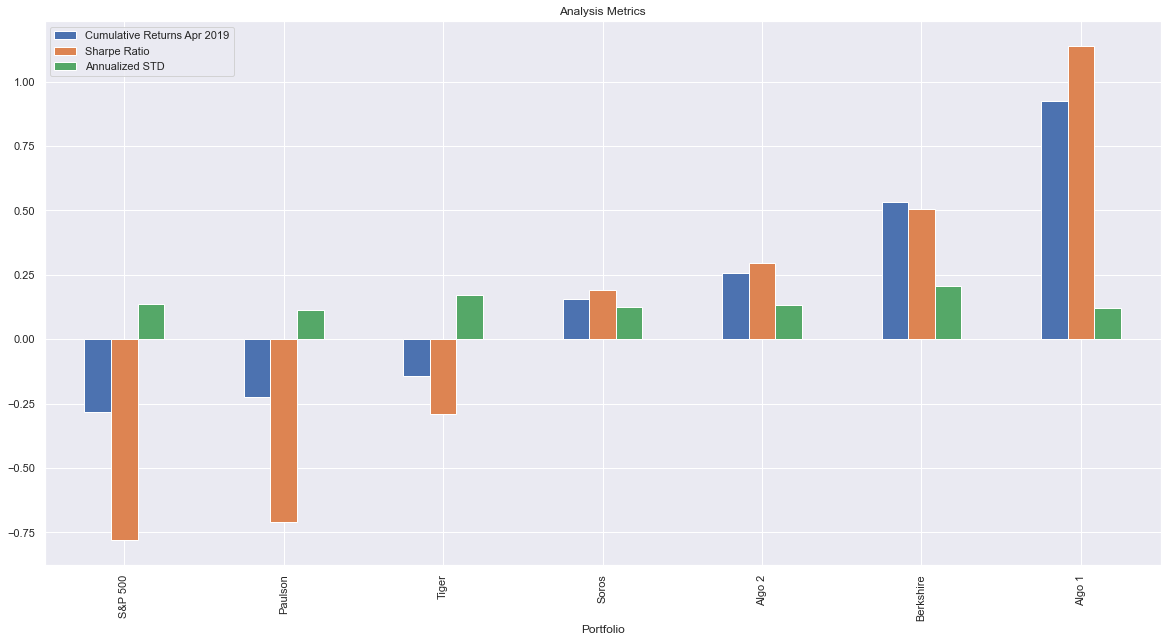

In [859]:
metrics_chart.plot(kind='bar', title='Analysis Metrics')

#### And also re-printed all my graphs and charts in one place:

<AxesSubplot:title={'center':'Cumulative Returns (2015-2019): Humans vs. Algorithms vs. Market'}, xlabel='Date'>

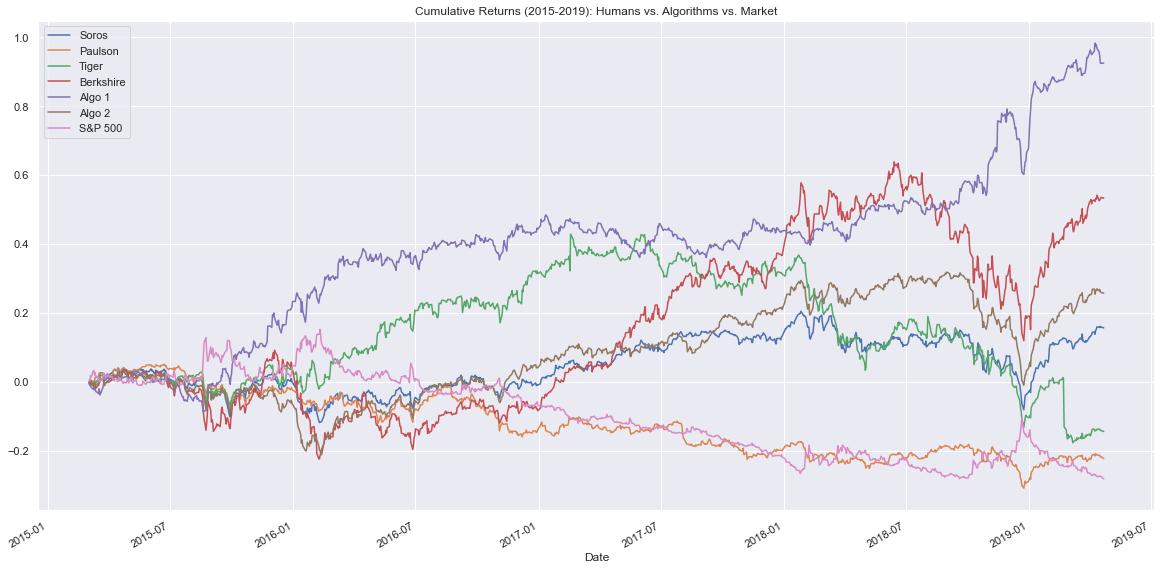

In [860]:
# I want all my charts in the same place:
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns (2015-2019): Humans vs. Algorithms vs. Market')

In [861]:
cumulative_returns_chart.head(8)

,Cumulative Returns Apr 2019
Portfolio,
S&P 500,-28.1
Paulson,-22.3
Tiger,-14.4
Soros,15.6
Algo 2,25.7
Berkshire,53.3
Algo 1,92.5


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Portfolio'>

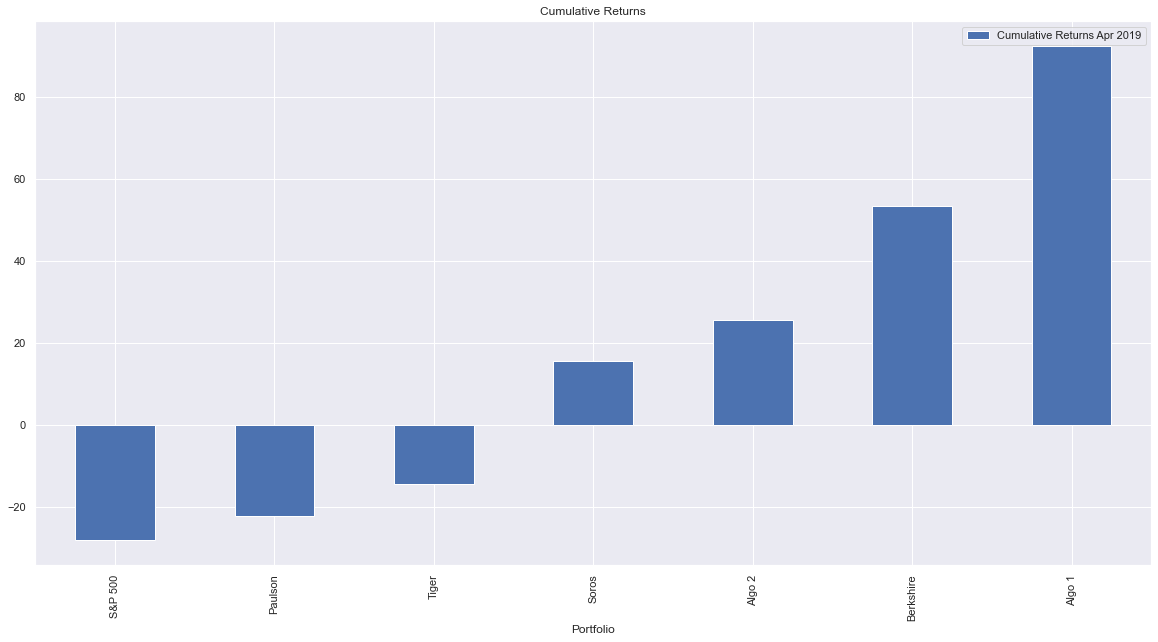

In [862]:
cumulative_returns_chart.plot(kind='bar', title='Cumulative Returns')

<AxesSubplot:title={'center':'Sharpe Ratios'}>

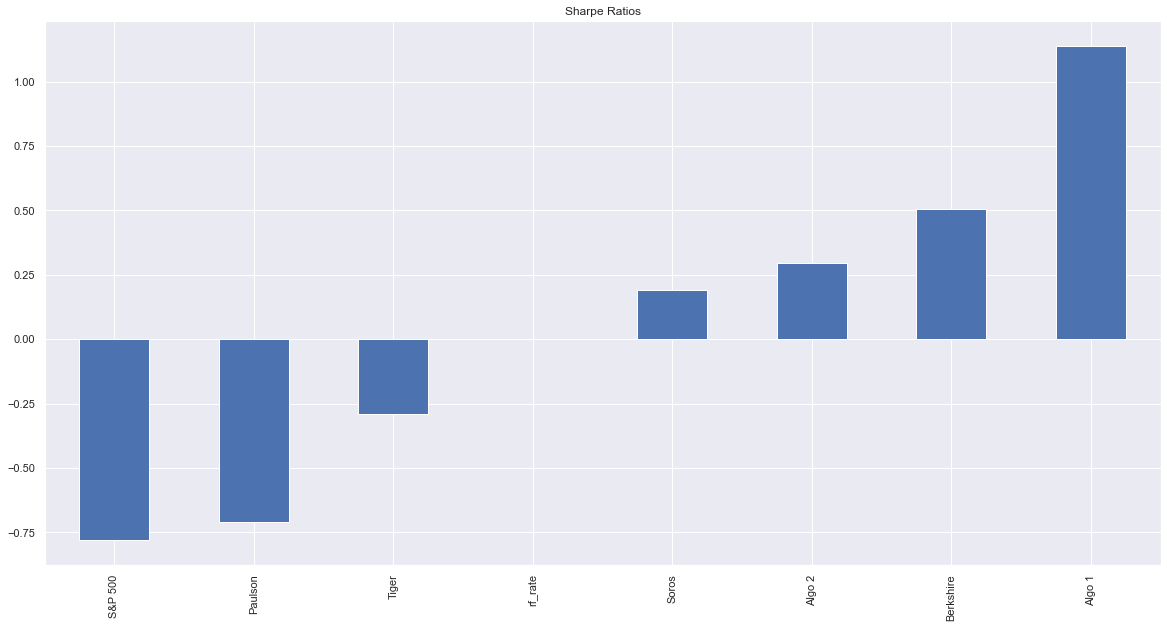

In [863]:
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

<AxesSubplot:title={'center':'Risk Plot - Daily Returns (2015-2019): Humans vs. Algorithms vs. Market'}>

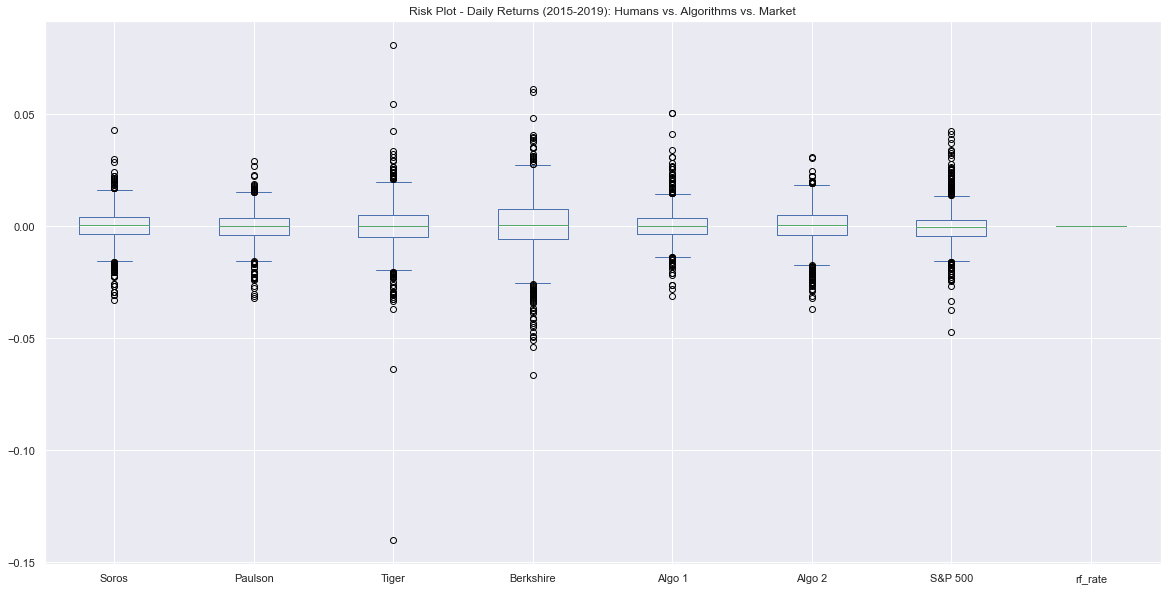

In [864]:
daily_returns.plot.box(figsize=(20,10), title='Risk Plot - Daily Returns (2015-2019): Humans vs. Algorithms vs. Market')

<AxesSubplot:title={'center':'Annualized Standard Deviation'}, xlabel='Portfolio'>

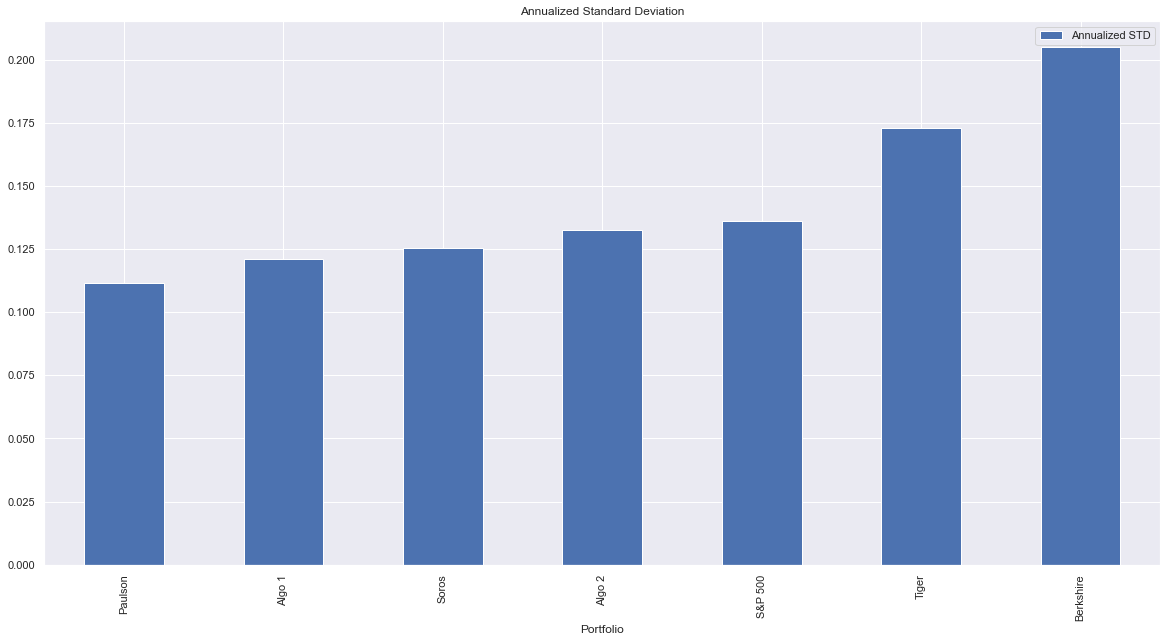

In [865]:
annualized_std_chart.plot(kind='bar', title='Annualized Standard Deviation')

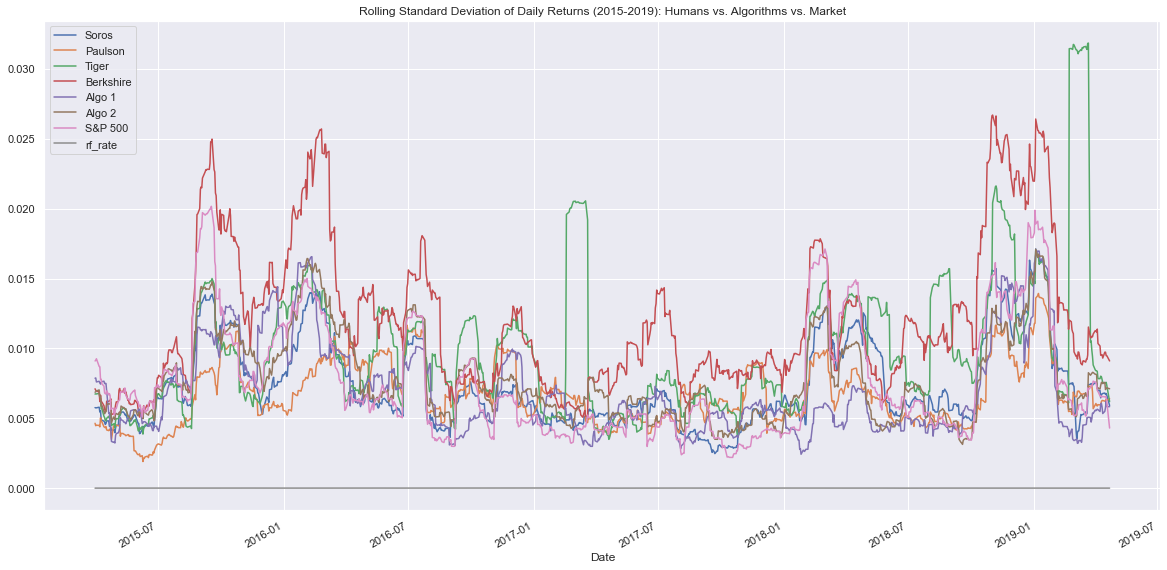

In [866]:
portfolio_rolling_std_21 = daily_returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Standard Deviation of Daily Returns (2015-2019): Humans vs. Algorithms vs. Market')


<AxesSubplot:>

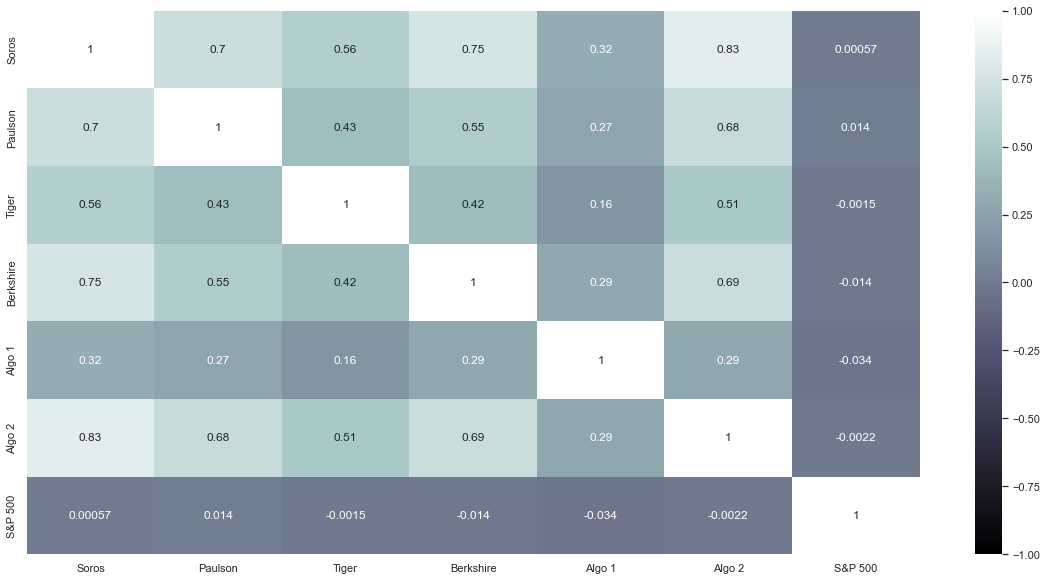

In [867]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True,  cmap="bone")


<AxesSubplot:title={'center':'Rolling 21-Day Beta of All Portfolios'}, xlabel='Date'>

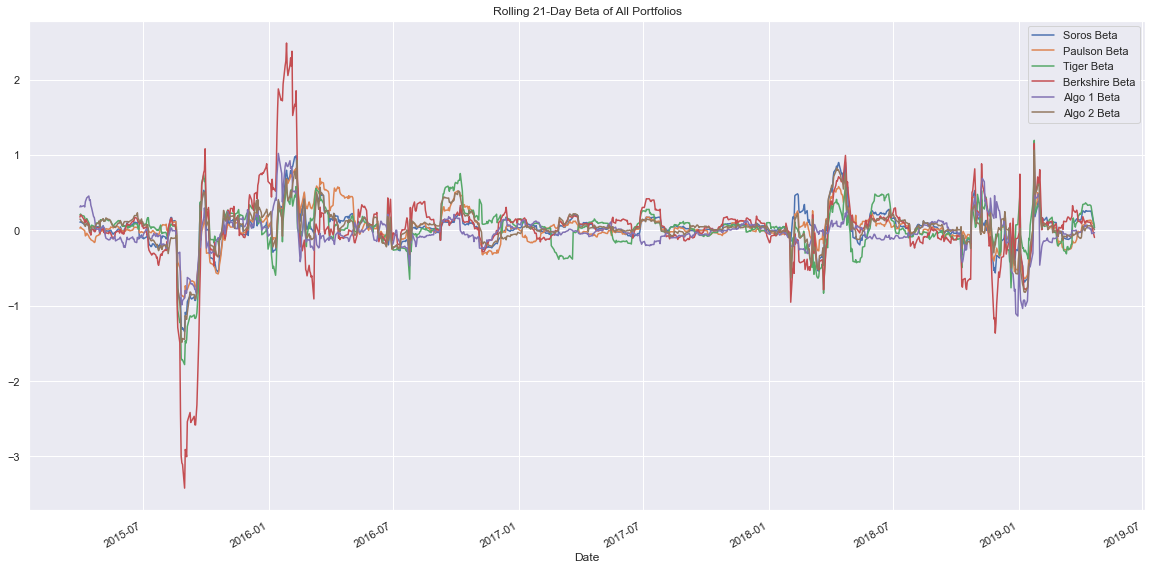

In [868]:
all_beta.plot(figsize=(20,10), title='Rolling 21-Day Beta of All Portfolios')


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [869]:
# Reading data from 1st (2nd, 3rd) stock

# At the beginning of the exercise I read in csvs one by one, so I want to try it using os.listdir and a for loop to ingest all of them at once.

dataframes = []
for filename in os.listdir('Stu_Portfolio'):
    df = pd.read_csv(f'Stu_Portfolio/{filename}', encoding='unicode_escape', parse_dates=True, infer_datetime_format=True, index_col=None)
    dataframes.append(df)

fulldata = pd.concat(dataframes, axis='columns', join='inner')
fulldata.head()



,Date,OXY,Unnamed: 0,Date,DIS,Date,WFC,Date,GOOG,Date,MDLZ


In [870]:
# This is having major issues. There is no data in the dataframe, and an extra weird unnamed column screwing everything up. I started with unicode errors; then an error about not being able to find 'Date' in list to set my index.
# After troubleshooting and checking all the csv files and finding they were all fine, I realized the issue is in the os.listdir listing of the filenames. 
os.listdir('Stu_Portfolio')

['oxy_history.csv',
 '.DS_Store',
 'dis_history.csv',
 'wfc_history.csv',
 'goog_history.csv',
 'mdlz_history.csv']

In [871]:
# The '.DS_Store' file is messing up the entire loop. To try to fix this, I'm creating a list that removes that file.
portfolio_dir = ['oxy_history.csv',
 'dis_history.csv',
 'wfc_history.csv',
 'goog_history.csv',
 'mdlz_history.csv']

In [872]:
# Now I'm running the loop again. It works! At first it came through with all the closing prices names 'close' so I had to go into the csvs and change the name of the close column in each.
dataframes = []
for filename in portfolio_dir:
    df = pd.read_csv(f'Stu_Portfolio/{filename}', parse_dates=True, infer_datetime_format=True, index_col='Date')
    dataframes.append(df)

fulldata = pd.concat(dataframes, axis='columns', join='inner')
fulldata.head()

,OXY,DIS,WFC,GOOG,MDLZ
Date,,,,,
2015-03-02,77.71,105.89,55.55,569.78,36.89
2015-03-03,77.98,106.35,55.45,572.07,36.64
2015-03-04,78.30,105.57,54.82,571.80,36.44
2015-03-05,77.46,105.03,54.84,573.75,36.51
2015-03-06,74.74,103.82,54.59,566.13,35.22


### Below this line was part of my attempt to check all the csv files individually to see what was wrong. So I ended up reading them all in anyway... oh well.
___

In [873]:
dis_history = Path('Stu_Portfolio/dis_history.csv')
dis_history = pd.read_csv(dis_history, parse_dates=True, infer_datetime_format=True, index_col='Date')
dis_history.sort_index()
dis_history.head()

,DIS
Date,
2015-03-02,105.89
2015-03-03,106.35
2015-03-04,105.57
2015-03-05,105.03
2015-03-06,103.82


In [874]:
goog_history = Path('Stu_Portfolio/goog_history.csv')
goog_history = pd.read_csv(goog_history, parse_dates=True, infer_datetime_format=True, index_col='Date')
goog_history.sort_index()
goog_history.head()

,GOOG
Date,
2015-03-02,569.78
2015-03-03,572.07
2015-03-04,571.80
2015-03-05,573.75
2015-03-06,566.13


In [875]:
mdlz_history = Path('Stu_Portfolio/mdlz_history.csv')
mdlz_history = pd.read_csv(mdlz_history, parse_dates=True, infer_datetime_format=True, index_col='Date')
mdlz_history.sort_index()
mdlz_history.head()

,MDLZ
Date,
2015-03-02,36.89
2015-03-03,36.64
2015-03-04,36.44
2015-03-05,36.51
2015-03-06,35.22


In [876]:
oxy_history = Path('Stu_Portfolio/oxy_history.csv')
oxy_history = pd.read_csv(oxy_history, parse_dates=True, infer_datetime_format=True, index_col='Date')
oxy_history.sort_index()
oxy_history.head()

,OXY
Date,
2015-03-02,77.71
2015-03-03,77.98
2015-03-04,78.30
2015-03-05,77.46
2015-03-06,74.74


In [877]:
# Reading data from 3rd stock
wfc_history = Path('Stu_Portfolio/wfc_history.csv')
wfc_history = pd.read_csv(wfc_history, parse_dates=True, infer_datetime_format=True, index_col='Date')
wfc_history.sort_index()
wfc_history.head()

,WFC
Date,
2015-03-02,55.55
2015-03-03,55.45
2015-03-04,54.82
2015-03-05,54.84
2015-03-06,54.59


___
### Above this line is my troubleshooting work.

In [878]:
# Combine all stocks in a single DataFrame
# See above - combined when read in.
fulldata.head()

,OXY,DIS,WFC,GOOG,MDLZ
Date,,,,,
2015-03-02,77.71,105.89,55.55,569.78,36.89
2015-03-03,77.98,106.35,55.45,572.07,36.64
2015-03-04,78.30,105.57,54.82,571.80,36.44
2015-03-05,77.46,105.03,54.84,573.75,36.51
2015-03-06,74.74,103.82,54.59,566.13,35.22


In [879]:
# Reset Date index
# See above - combined when read in.
fulldata.head()

,OXY,DIS,WFC,GOOG,MDLZ
Date,,,,,
2015-03-02,77.71,105.89,55.55,569.78,36.89
2015-03-03,77.98,106.35,55.45,572.07,36.64
2015-03-04,78.30,105.57,54.82,571.80,36.44
2015-03-05,77.46,105.03,54.84,573.75,36.51
2015-03-06,74.74,103.82,54.59,566.13,35.22


In [880]:
# Reorganize portfolio data by having a column per symbol
# See above - combined when read in.
fulldata.head()

,OXY,DIS,WFC,GOOG,MDLZ
Date,,,,,
2015-03-02,77.71,105.89,55.55,569.78,36.89
2015-03-03,77.98,106.35,55.45,572.07,36.64
2015-03-04,78.30,105.57,54.82,571.80,36.44
2015-03-05,77.46,105.03,54.84,573.75,36.51
2015-03-06,74.74,103.82,54.59,566.13,35.22


In [881]:
# Calculate daily returns
port_daily_returns = fulldata.pct_change()

# Drop NAs
port_daily_returns = port_daily_returns.dropna()

# Display sample data
port_daily_returns.head()

,OXY,DIS,WFC,GOOG,MDLZ
Date,,,,,
2015-03-03,0.003474,0.004344,-0.001800,0.004019,-0.006777
2015-03-04,0.004104,-0.007334,-0.011362,-0.000472,-0.005459
2015-03-05,-0.010728,-0.005115,0.000365,0.003410,0.001921
2015-03-06,-0.035115,-0.011521,-0.004559,-0.013281,-0.035333
2015-03-09,0.000401,0.013870,0.001465,0.002049,0.005679


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [882]:
# Set weights
# I'm going to weight these separately in a dictionary.
weight = {'OXY':0.1, 'DIS':0.15, 'WFC':0.2, 'GOOG':0.25, 'MDLZ':0.3}

# And check that it works (it works):
#print(weight['OXY'])

# I'm also going to add my stocks to a list, first by getting the names using .columns and then setting the variable.
#port_daily_returns.columns
stocks = ['OXY', 'DIS', 'WFC', 'GOOG', 'MDLZ']

# Calculate portfolio return
# There has to be an easier way to do this, but this is the manual way:
portfolio_returns = (weight['OXY'] * port_daily_returns['OXY']) + (weight['DIS'] * port_daily_returns['DIS']) + (weight['WFC'] * port_daily_returns['WFC']) + (weight['GOOG'] * port_daily_returns['GOOG']) + (weight['MDLZ'] * port_daily_returns['MDLZ']) 

# Display sample data
portfolio_returns.head()


Date
2015-03-03   -0.000389
2015-03-04   -0.004718
2015-03-05   -0.000338
2015-03-06   -0.020071
2015-03-09    0.004630
dtype: float64

<AxesSubplot:title={'center':'Personal Portfolio Returns'}, xlabel='Date'>

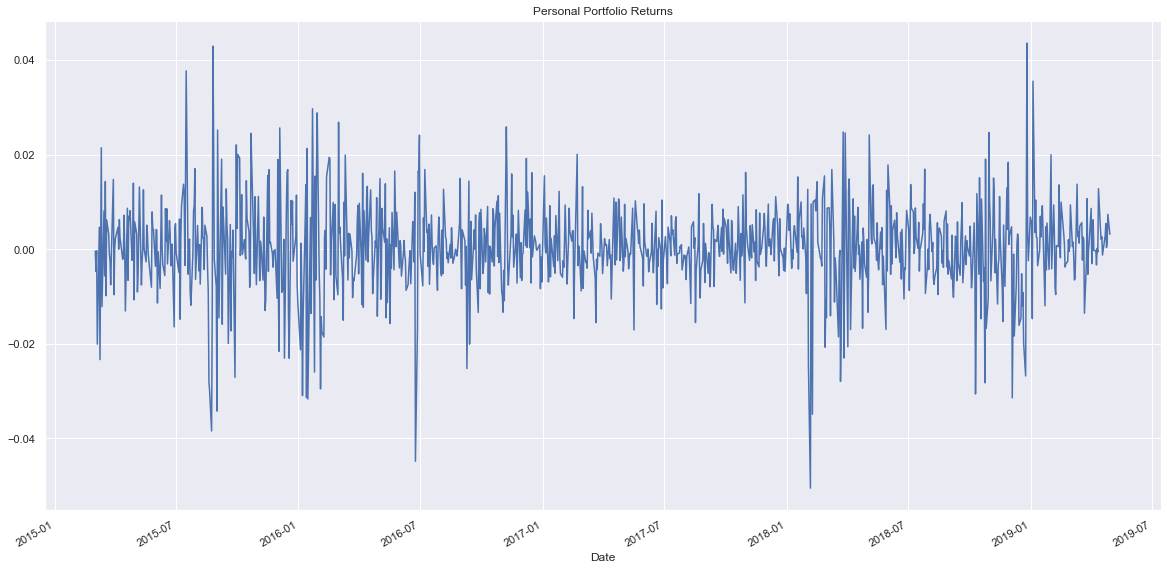

In [883]:
# I want to see what this looks like:
portfolio_returns.plot(figsize=(20,10), title='Personal Portfolio Returns')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [901]:
# Join your returns DataFrame to the original returns DataFrame
comp_daily_returns = pd.concat([daily_returns, port_daily_returns], axis='columns', join='inner')
comp_daily_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,rf_rate,OXY,DIS,WFC,GOOG,MDLZ
Date,,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.000002,0.003474,0.004344,-0.001800,0.004019,-0.006777
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000001,0.004104,-0.007334,-0.011362,-0.000472,-0.005459
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000002,-0.010728,-0.005115,0.000365,0.003410,0.001921
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.000001,-0.035115,-0.011521,-0.004559,-0.013281,-0.035333
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000002,0.000401,0.013870,0.001465,0.002049,0.005679


In [903]:
# I already have the daily returns for the whole portfolio saved as portfolio_returns but I want to add it to my comp_daily_returns table.

# To add my portfolio I want to convert the portfolio_returns list into a dataframe
portfolio_returns_df = portfolio_returns.reset_index()
portfolio_returns_df.columns = ['Date', 'My Portfolio']
portfolio_returns_df.reset_index(drop=True, inplace=True)
portfolio_returns_df.set_index('Date', inplace=True)
portfolio_returns_df.head()

,My Portfolio
Date,
2015-03-03,-0.000389
2015-03-04,-0.004718
2015-03-05,-0.000338
2015-03-06,-0.020071
2015-03-09,0.004630


In [904]:
# Now
portfolio_returns_df.head()

# Then concatenate the df into the comp_daily_returns dataframe
comp_daily_returns = pd.concat([comp_daily_returns, portfolio_returns], axis='columns', join='inner')

comp_daily_returns = comp_daily_returns.rename(columns={0:'My Portfolio'})
comp_daily_returns.head()



,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,rf_rate,OXY,DIS,WFC,GOOG,MDLZ,My Portfolio
Date,,,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.000002,0.003474,0.004344,-0.001800,0.004019,-0.006777,-0.000389
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000001,0.004104,-0.007334,-0.011362,-0.000472,-0.005459,-0.004718
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000002,-0.010728,-0.005115,0.000365,0.003410,0.001921,-0.000338
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.000001,-0.035115,-0.011521,-0.004559,-0.013281,-0.035333,-0.020071
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000002,0.000401,0.013870,0.001465,0.002049,0.005679,0.004630


In [905]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comp_daily_returns = comp_daily_returns.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [906]:
# Calculate the annualized `std`
comp_daily_std = comp_daily_returns.std()
comp_annualized_std = comp_daily_std * np.sqrt(252)
comp_annualized_std

Soros           0.125387
Paulson         0.111521
Tiger           0.173178
Berkshire       0.205405
Algo 1          0.121132
Algo 2          0.132312
S&P 500         0.136382
rf_rate         0.001456
OXY             0.244102
DIS             0.195586
WFC             0.213265
GOOG            0.238877
MDLZ            0.211457
My Portfolio    0.153150
dtype: float64

### Calculate and plot rolling `std` with 21-day window

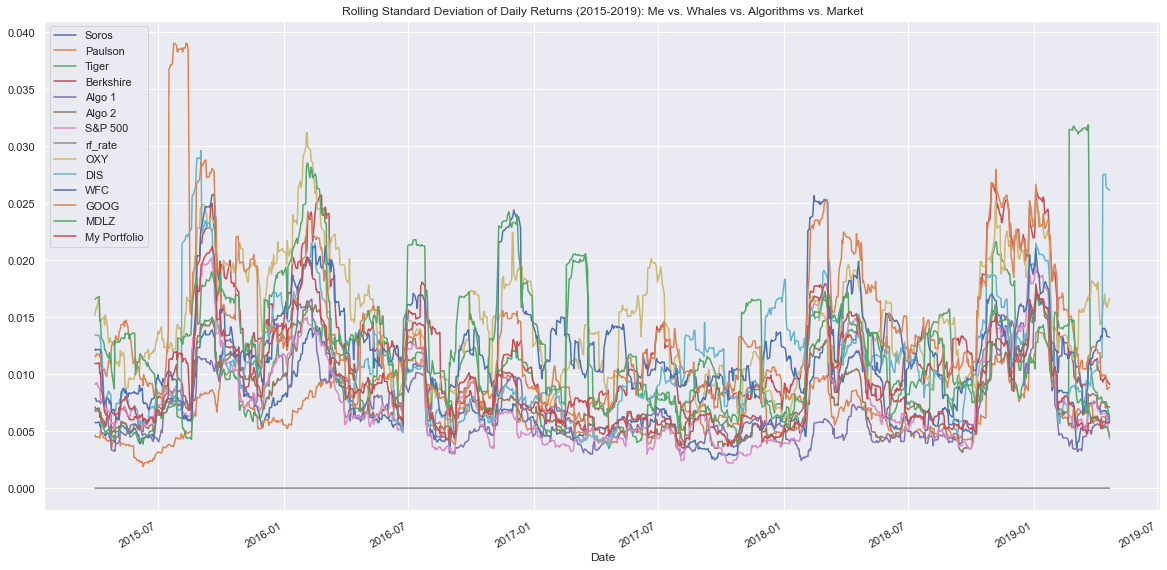

In [907]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
comp_rolling_std_21 = comp_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Standard Deviation of Daily Returns (2015-2019): Me vs. Whales vs. Algorithms vs. Market')

### Calculate and plot the correlation

<AxesSubplot:>

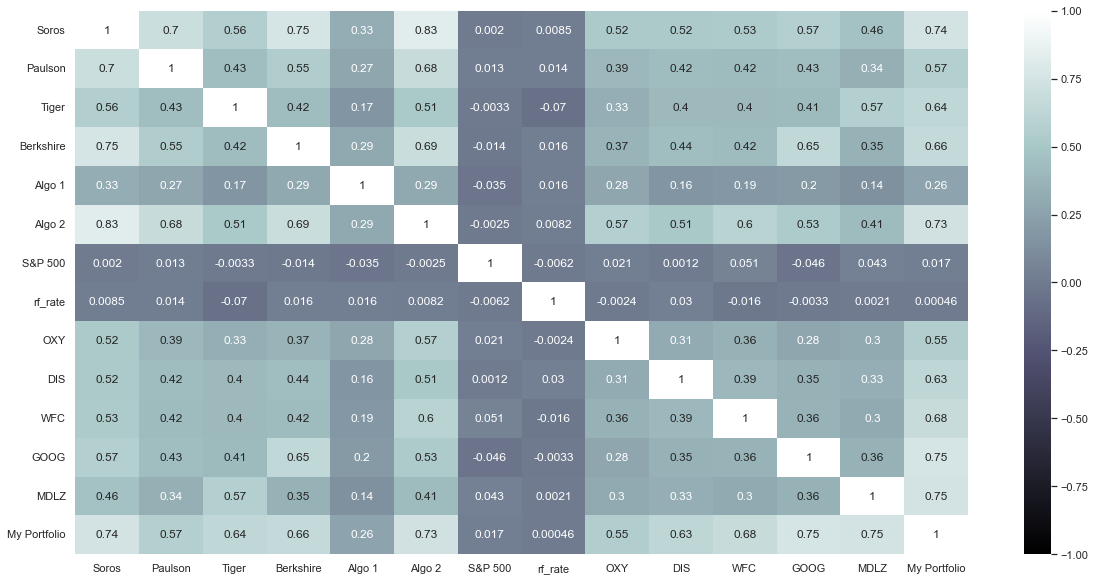

In [908]:
# Calculate and plot the correlation
comp_correlation = comp_daily_returns.corr()

# I'm going to use seaborn to plot this on a heatmap. I needed to re-seize the window.
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(comp_correlation, vmin=-1, vmax=1, annot=True,  cmap="bone")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio (2014-2015'}, xlabel='Date'>

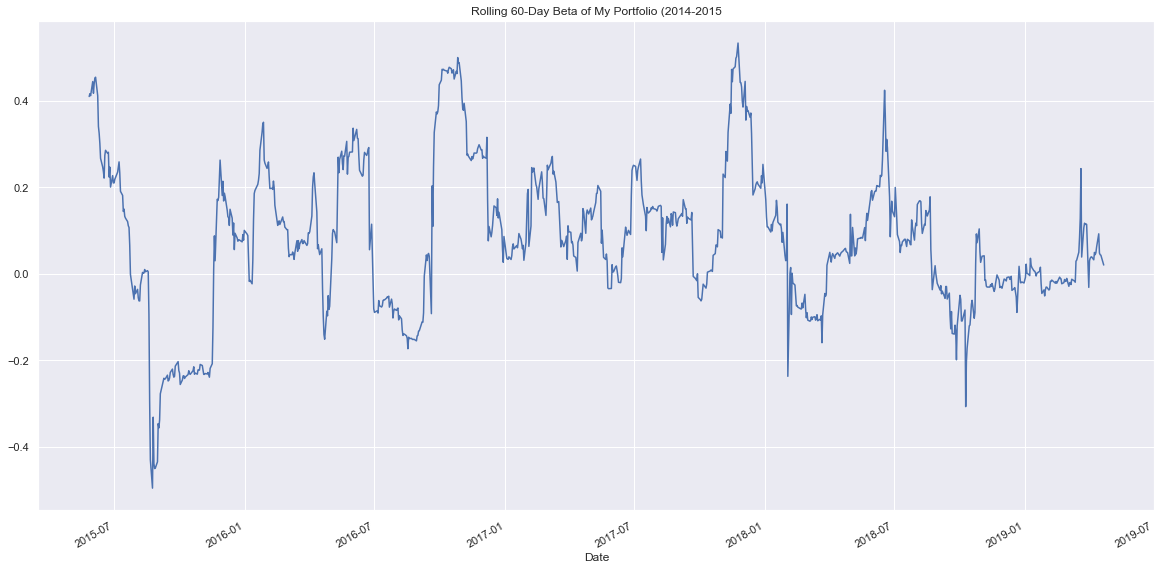

In [909]:
# Calculate and plot Beta #
# Create a new rolling covariance variable for my portfolio. 
my_port_covariance = comp_daily_returns['My Portfolio'].rolling(window=60).cov(comp_daily_returns['S&P 500'])

# Create a new rolling variable for variance
rolling_variance_60 = comp_daily_returns['S&P 500'].rolling(window=60).var()

# Calculate rolling beta
my_port_beta = my_port_covariance / rolling_variance_60

# Plot beta
my_port_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of My Portfolio (2014-2015')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [910]:
# Calculate Annualized Sharpe Ratios
comp_sharpe_ratios = ((comp_daily_returns.mean()-comp_daily_returns['rf_rate'].mean()) * 252) / (comp_daily_returns.std() * np.sqrt(252))
comp_sharpe_ratios = comp_sharpe_ratios.sort_values(ascending=True)
comp_sharpe_ratios.head(15)

S&P 500        -0.779208
Paulson        -0.710552
Tiger          -0.289643
WFC            -0.198257
OXY            -0.171470
rf_rate         0.000000
Soros           0.190407
DIS             0.204178
Algo 2          0.297261
MDLZ            0.337666
My Portfolio    0.418094
Berkshire       0.506337
GOOG            0.824895
Algo 1          1.138814
dtype: float64

<AxesSubplot:title={'center':'All Sharpe Ratios'}, xlabel='Portfolio'>

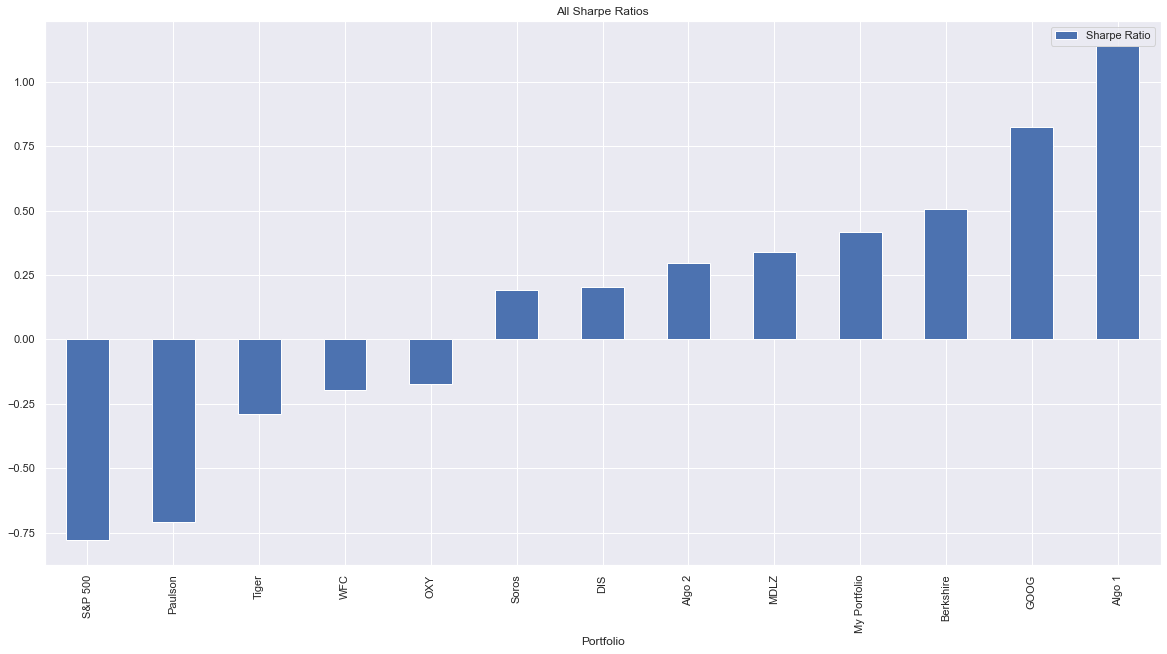

In [911]:
# Visualize the sharpe ratios as a bar plot
comp_sharpe_chart = comp_sharpe_ratios.reset_index()
comp_sharpe_chart.columns=['Portfolio', 'Sharpe Ratio']
comp_sharpe_chart = comp_sharpe_chart.set_index('Portfolio')
comp_sharpe_chart = comp_sharpe_chart.drop('rf_rate')
comp_sharpe_chart = comp_sharpe_chart.sort_values('Sharpe Ratio')
comp_sharpe_chart.head(8)
comp_sharpe_chart.plot(kind='bar', figsize=(20,10),title='All Sharpe Ratios')

<AxesSubplot:title={'center':'Cumulative Returns (2015-2019): Me vs. Whales vs. Algorithms vs. Market'}, xlabel='Date'>

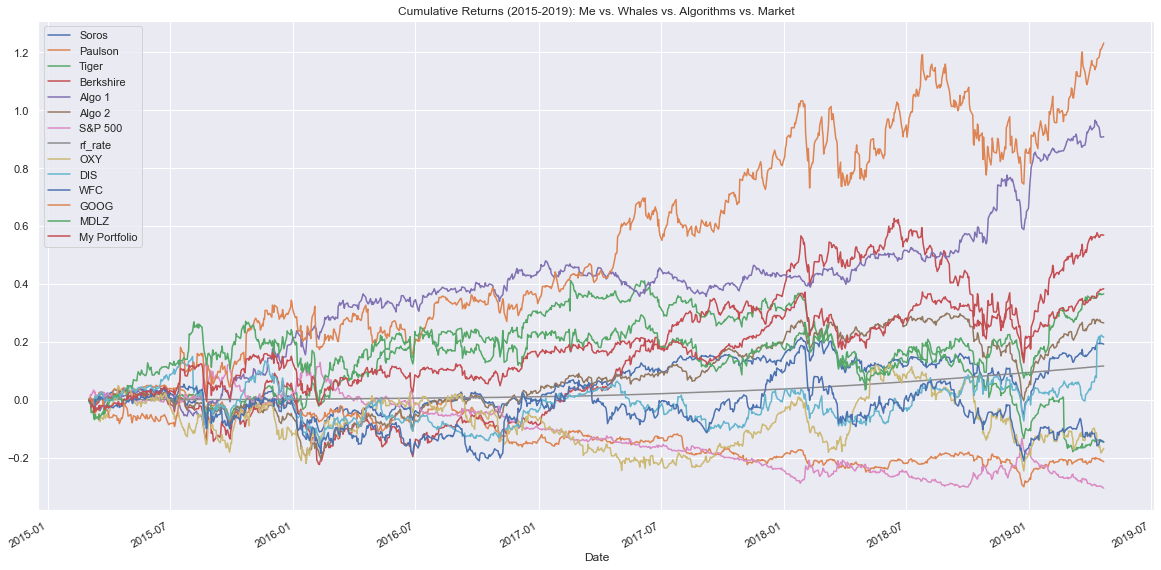

In [912]:
# I also want my cumulative returns
comp_cumulative_returns = (1 + comp_daily_returns).cumprod() - 1
# Plot cumulative returns
comp_cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns (2015-2019): Me vs. Whales vs. Algorithms vs. Market')

In [913]:
comp_cumulative_returns.tail(1)

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,rf_rate,OXY,DIS,WFC,GOOG,MDLZ,My Portfolio
Date,,,,,,,,,,,,,,
2019-04-22,0.191891,-0.21435,-0.146745,0.568335,0.908334,0.265299,-0.305652,0.11605,-0.1684,0.215691,-0.145576,1.232232,0.365301,0.383378


In [914]:
comp_cum_ret_chart = pd.DataFrame({'Portfolio':['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo 1', 'Algo 2', 'S&P 500', 'OXY', 'DIS', 'WFC', 'GOOG', 'MDLZ', 'My Portfolio'], 'Cumulative Returns Apr 2019': [19.2, -21.4, -14.6, 56.8, 90.8, 26.5, -30.6, -16.8, 21.6, -14.6, 123.2, 36.5, 18.1]})
comp_cum_ret_chart = comp_cum_ret_chart.set_index('Portfolio')
comp_cum_ret_chart = comp_cum_ret_chart.sort_values('Cumulative Returns Apr 2019')
comp_cum_ret_chart.head(15)

,Cumulative Returns Apr 2019
Portfolio,
S&P 500,-30.6
Paulson,-21.4
OXY,-16.8
Tiger,-14.6
WFC,-14.6
My Portfolio,18.1
Soros,19.2
DIS,21.6
Algo 2,26.5


In [915]:
# I also want to check out the standard deviation chart I had used before
comp_daily_std = comp_daily_returns.std()
comp_annualized_std = comp_daily_std * np.sqrt(252)
comp_annstdev_chart = comp_annualized_std.reset_index()
comp_annstdev_chart.columns=['Portfolio', 'Annualized STD']
comp_annstdev_chart = comp_annstdev_chart.set_index('Portfolio')
comp_annstdev_chart = comp_annstdev_chart.drop('rf_rate')
comp_annstdev_chart = comp_annstdev_chart.sort_values('Annualized STD')
comp_annstdev_chart.head(15)

,Annualized STD
Portfolio,
Paulson,0.111521
Algo 1,0.121132
Soros,0.125387
Algo 2,0.132312
S&P 500,0.136382
My Portfolio,0.153150
Tiger,0.173178
DIS,0.195586
Berkshire,0.205405


In [916]:
comp_metrics_chart = pd.concat([comp_cum_ret_chart, comp_sharpe_chart, comp_annstdev_chart], axis='columns', join='inner')
comp_metrics_chart['Cumulative Returns Apr 2019'] = comp_metrics_chart['Cumulative Returns Apr 2019'] / 100
comp_metrics_chart.head(15)

,Cumulative Returns Apr 2019,Sharpe Ratio,Annualized STD
Portfolio,,,
S&P 500,-0.306,-0.779208,0.136382
Paulson,-0.214,-0.710552,0.111521
OXY,-0.168,-0.171470,0.244102
Tiger,-0.146,-0.289643,0.173178
WFC,-0.146,-0.198257,0.213265
My Portfolio,0.181,0.418094,0.153150
Soros,0.192,0.190407,0.125387
DIS,0.216,0.204178,0.195586
Algo 2,0.265,0.297261,0.132312


<AxesSubplot:title={'center':'Metrics'}, xlabel='Portfolio'>

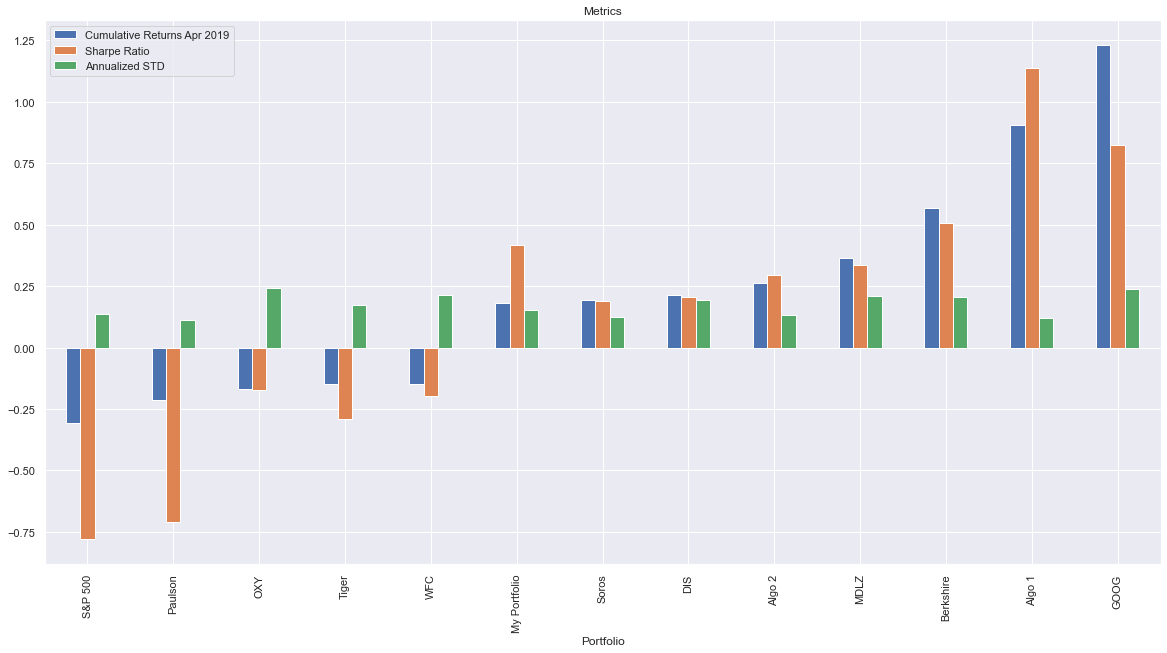

In [917]:
comp_metrics_chart.plot(kind='bar', figsize=(20,10), title='Metrics')

In [900]:
# Project for the future - figure out how to change weights and all the metrics
# weight = {'OXY':0.1, 'DIS':0.15, 'WFC':0.2, 'GOOG':0.25, 'MDLZ':0.3}

# And check that it works (it works):
#print(weight['OXY'])

# I'm also going to add my stocks to a list, first by getting the names using .columns and then setting the variable.
#port_daily_returns.columns
# stocks = ['OXY', 'DIS', 'WFC', 'GOOG', 'MDLZ']

# Calculate portfolio return
# There has to be an easier way to do this, but this is the manual way:
# portfolio_returns = (weight['OXY'] * port_daily_returns['OXY']) + (weight['DIS'] * port_daily_returns['DIS']) + (weight['WFC'] * port_daily_returns['WFC']) + (weight['GOOG'] * port_daily_returns['GOOG']) + (weight['MDLZ'] * port_daily_returns['MDLZ']) 


### How does your portfolio do?

Write your answer here!

My portfolio did ehhh... ok. It had gains of 18.1%, right about where Soros ended up at 19.2%. Given that the market did so poorly over these years I'd be ok with these results, but I would probably wish I'd gone with Algo 1 or just Google for everything!

I picked stocks from a list showing top stocks across different industries, so it's a good look at how the different sectors of the market were doing during these years. Google, and tech in general, did very well, posting phenomenal gains objectively, but also looking very strong because tech lost a lot in 2009. Based on the cumulative gains chart I'd guess that Algo 1 was heavy on Google and other similar stocks, but looking at the correlation heat map Algo 1 doesn't correlate very strongly with anything, including Google. It doesn't have a correspondence higher than 0.33 for anything. Compare that to Algo 2, which did correlate more strongly to the movement of Google: 0.53.

Mondelez International is the parent company of several well-known snack food brands (e.g., Cadbury, Nabisco) and represents the consumer staples market. It was a relatively safe pick, and it did relatively well with low volatility. It was my second strongest pick.

Disney came in with 20.6% returns, and represented the entertainment industry. I'd be interested to see what some of the other entertainment platforms that really started gaining momentum during these years looked like compared to Disney.

Wells Fargo was the banking industry pick, and it lost 14.6%. I'd be interested to see what a less traditional bank did during this time.

Finally, Oxy was my petroleum industry pick, and it lost 16.8%. I'm lucky just this simulation ended in April 2019 for Oxy.

Overall, if I had more time to really research and pick stocks for myself I'd go with a far less traditional portfolio. This portfolio returned what I would expect given the makeup - an average gain, better than market, with relatively low risk.